In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379067, 30)
After OverSampling, the shape of train_y: (379067,) 

After OverSampling, counts of label '1': 189524
After OverSampling, counts of label '0': 189543
Train on 189871 samples, validate on 94936 samples
Epoch 1/150
189871/189871 [==============================] - 18s 96us/step - loss: 0.0019 - val_loss: 3.1380e-04
Epoch 2/150
189871/189871 [==============================] - 16s 83us/step - loss: 2.3150e-04 - val_loss: 1.7258e-04
Epoch 3/150
189871/189871 [==============================] - 18s 97us/step - loss: 1.4685e-04 - val_loss: 1.3869e-04
Epoch 4/150
189871/189871 [==============================] - 19s 101us/step - loss: 1.2711e-04 - val_loss: 1.1838e-04
Epoch 5/150
189871/189871 [==============================] - 19s 98us/step - loss: 1.1955e-04 - val_loss: 1.2384e-04
Epoch 6/150
189871/189871 [==============================] - 19s 98us/step - loss: 1.0825e-04 - val_loss: 1.0013e-04
Epoch 7/150
189871/189871 [==================

189871/189871 [==============================] - 18s 95us/step - loss: 4.3091e-05 - val_loss: 4.0897e-05
Epoch 69/150
189871/189871 [==============================] - 18s 95us/step - loss: 4.2503e-05 - val_loss: 4.1252e-05
Epoch 70/150
189871/189871 [==============================] - 18s 96us/step - loss: 4.2654e-05 - val_loss: 4.4469e-05
Epoch 71/150
189871/189871 [==============================] - 18s 95us/step - loss: 4.2285e-05 - val_loss: 3.8990e-05
Epoch 72/150
189871/189871 [==============================] - 18s 95us/step - loss: 4.2454e-05 - val_loss: 4.0822e-05
Epoch 73/150
189871/189871 [==============================] - 18s 95us/step - loss: 4.2079e-05 - val_loss: 3.9315e-05
Epoch 74/150
189871/189871 [==============================] - 18s 95us/step - loss: 4.2208e-05 - val_loss: 3.7805e-05
Epoch 75/150
189871/189871 [==============================] - 18s 95us/step - loss: 4.2052e-05 - val_loss: 4.0643e-05
Epoch 76/150
189871/189871 [==============================] - 18s 95u

189871/189871 [==============================] - 18s 96us/step - loss: 3.6599e-05 - val_loss: 3.6466e-05
Epoch 138/150
189871/189871 [==============================] - 18s 96us/step - loss: 3.5624e-05 - val_loss: 4.0366e-05
Epoch 139/150
189871/189871 [==============================] - 18s 95us/step - loss: 3.6000e-05 - val_loss: 3.1900e-05
Epoch 140/150
189871/189871 [==============================] - 18s 95us/step - loss: 3.5272e-05 - val_loss: 3.4573e-05
Epoch 141/150
189871/189871 [==============================] - 18s 95us/step - loss: 3.5821e-05 - val_loss: 3.8494e-05
Epoch 142/150
189871/189871 [==============================] - 18s 95us/step - loss: 3.5550e-05 - val_loss: 4.3850e-05
Epoch 143/150
189871/189871 [==============================] - 18s 95us/step - loss: 3.5664e-05 - val_loss: 4.1053e-05
Epoch 144/150
189871/189871 [==============================] - 18s 95us/step - loss: 3.5349e-05 - val_loss: 4.0626e-05
Epoch 145/150
189871/189871 [==============================] -

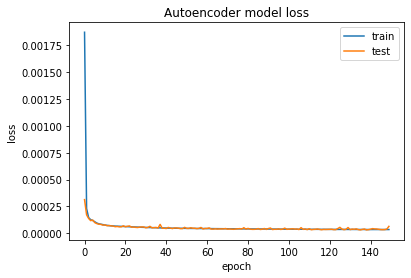

Train on 189871 samples, validate on 94936 samples
Epoch 1/50
189871/189871 [==============================] - 42s 224us/step - loss: 0.0247 - accuracy: 0.9937 - val_loss: 0.0062 - val_accuracy: 0.9989
Epoch 2/50
189871/189871 [==============================] - 40s 211us/step - loss: 0.0082 - accuracy: 0.9986 - val_loss: 0.0052 - val_accuracy: 0.9991
Epoch 3/50
189871/189871 [==============================] - 40s 211us/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 4/50
189871/189871 [==============================] - 40s 212us/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 5/50
189871/189871 [==============================] - 40s 211us/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 6/50
189871/189871 [==============================] - 40s 213us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 7/50
189871/189871 [=================

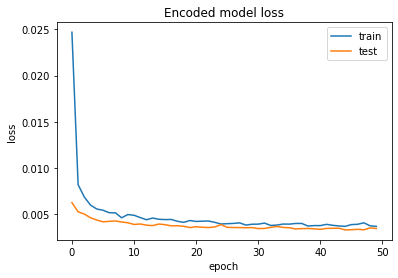

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993469284570659


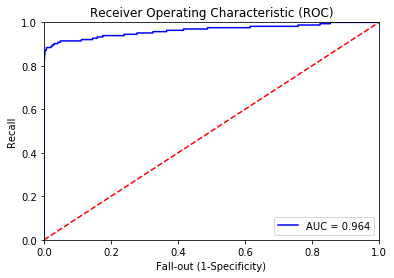

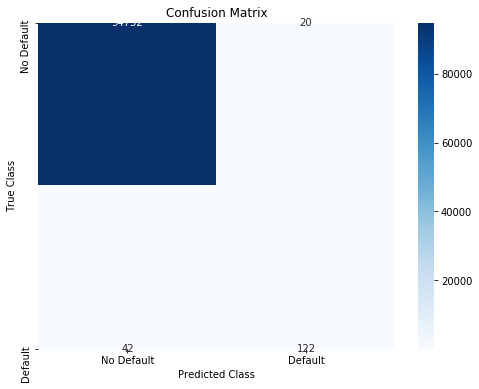

AUC(ROC): 0.8718457031149469
Precision: 0.8591549295774648
Recall: 0.7439024390243902
F1 score: 0.7973856209150327
False positives: 20
True positives: 122
False negatives: 42
True negatives: 94752
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379072, 30)
After OverSampling, the shape of train_y: (379072,) 

After OverSampling, counts of label '1': 189529
After OverSampling, counts of label '0': 189543
Train on 189871 samples, validate on 94936 samples
Epoch 1/150
189871/189871 [==============================] - 22s 116us/step - loss: 0.0017 - val_loss: 3.4054e-04
Epoch 2/150
189871/189871 [==============================] - 21s 111us/step - loss: 2.4022e-04 - val_loss: 1.8177e-04
Epoch 3/150
189871/189871 [==============================] - 21s 108us/step - loss: 1.6008e-04 - val_loss: 1.4162e-04
Epoch 4/150
189871/189871 [==============================] - 21s 110us/step - loss: 1.2791e-04 - val_loss: 1.2201e-04
Epoch 5/150
189871/189871 [==============================] - 21s 108us/step - loss: 1.1749e-04 - val_loss: 1.2692e-04
Epoch 6/150
189871/189871 [==============================] - 21s 110us/step - loss: 1.1088e-04 - val_loss: 1.0726e-04
Epoch 7/150
189871/189871 [=============

Epoch 68/150
189871/189871 [==============================] - 19s 100us/step - loss: 4.0701e-05 - val_loss: 3.7920e-05
Epoch 69/150
189871/189871 [==============================] - 19s 102us/step - loss: 4.0290e-05 - val_loss: 3.9049e-05
Epoch 70/150
189871/189871 [==============================] - 19s 101us/step - loss: 4.0257e-05 - val_loss: 5.2708e-05
Epoch 71/150
189871/189871 [==============================] - 19s 100us/step - loss: 3.9872e-05 - val_loss: 4.2877e-05
Epoch 72/150
189871/189871 [==============================] - 19s 100us/step - loss: 3.9786e-05 - val_loss: 3.9195e-05
Epoch 73/150
189871/189871 [==============================] - 19s 101us/step - loss: 3.9508e-05 - val_loss: 3.8594e-05
Epoch 74/150
189871/189871 [==============================] - 19s 101us/step - loss: 3.9197e-05 - val_loss: 3.7999e-05
Epoch 75/150
189871/189871 [==============================] - 19s 98us/step - loss: 3.9315e-05 - val_loss: 4.4584e-05
Epoch 76/150
189871/189871 [=====================

189871/189871 [==============================] - 18s 95us/step - loss: 3.2387e-05 - val_loss: 3.2669e-05
Epoch 143/150
189871/189871 [==============================] - 18s 95us/step - loss: 3.2336e-05 - val_loss: 3.2157e-05
Epoch 144/150
189871/189871 [==============================] - 18s 95us/step - loss: 3.2828e-05 - val_loss: 3.1120e-05
Epoch 145/150
189871/189871 [==============================] - 18s 95us/step - loss: 3.2610e-05 - val_loss: 3.8167e-05
Epoch 146/150
189871/189871 [==============================] - 18s 95us/step - loss: 3.2509e-05 - val_loss: 3.2969e-05
Epoch 147/150
189871/189871 [==============================] - 18s 96us/step - loss: 3.2291e-05 - val_loss: 3.5880e-05
Epoch 148/150
189871/189871 [==============================] - 18s 96us/step - loss: 3.2346e-05 - val_loss: 3.4658e-05
Epoch 149/150
189871/189871 [==============================] - 18s 97us/step - loss: 3.2069e-05 - val_loss: 3.0402e-05
Epoch 150/150
189871/189871 [==============================] -

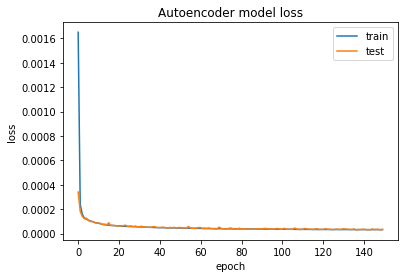

Train on 189871 samples, validate on 94936 samples
Epoch 1/50
189871/189871 [==============================] - 42s 223us/step - loss: 0.0535 - accuracy: 0.9839 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 2/50
189871/189871 [==============================] - 41s 214us/step - loss: 0.0085 - accuracy: 0.9986 - val_loss: 0.0038 - val_accuracy: 0.9995
Epoch 3/50
189871/189871 [==============================] - 41s 214us/step - loss: 0.0070 - accuracy: 0.9988 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 4/50
189871/189871 [==============================] - 41s 215us/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 5/50
189871/189871 [==============================] - 41s 214us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 6/50
189871/189871 [==============================] - 41s 214us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 7/50
189871/189871 [=================

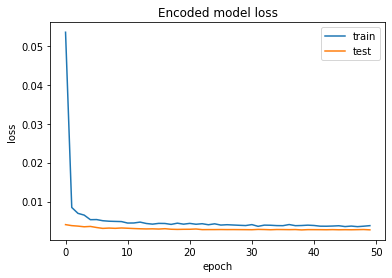

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994838628128423


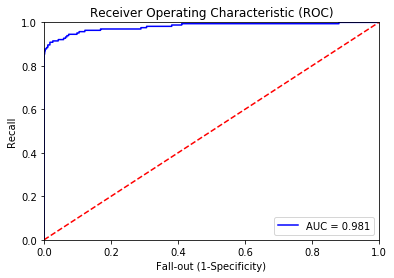

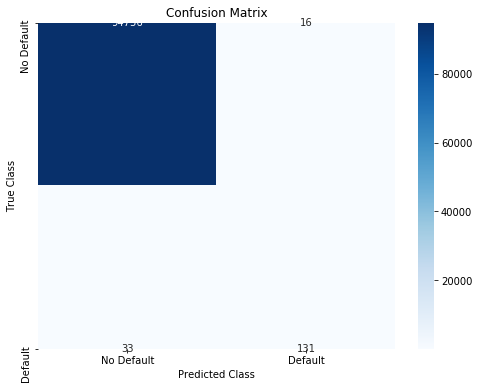

AUC(ROC): 0.8993058307846405
Precision: 0.891156462585034
Recall: 0.7987804878048781
F1 score: 0.842443729903537
False positives: 16
True positives: 131
False negatives: 33
True negatives: 94756
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (379061, 30)
After OverSampling, the shape of train_y: (379061,) 

After OverSampling, counts of label '1': 189517
After OverSampling, counts of label '0': 189544
Train on 189872 samples, validate on 94935 samples
Epoch 1/150
189872/189872 [==============================] - 21s 108us/step - loss: 0.0021 - val_loss: 3.4664e-04
Epoch 2/150
189872/189872 [==============================] - 19s 102us/step - loss: 2.6802e-04 - val_loss: 2.1092e-04
Epoch 3/150
189872/189872 [==============================] - 19s 102us/step - loss: 1.6816e-04 - val_loss: 1.5759e-04
Epoch 4/150
189872/189872 [==============================] - 20s 104us/step - loss: 1.4374e-04 - val_loss: 1.3340e-04
Epoch 5/150
189872/189872 [==============================] - 20s 105us/step - loss: 1.2114e-04 - val_loss: 1.3387e-04
Epoch 6/150
189872/189872 [==============================] - 20s 105us/step - loss: 1.1134e-04 - val_loss: 1.0431e-04
Epoch 7/150
189872/189872 [=============

Epoch 96/150
189872/189872 [==============================] - 20s 103us/step - loss: 3.8778e-05 - val_loss: 4.0057e-05
Epoch 97/150
189872/189872 [==============================] - 20s 106us/step - loss: 3.8789e-05 - val_loss: 3.5043e-05
Epoch 98/150
189872/189872 [==============================] - 20s 106us/step - loss: 3.8557e-05 - val_loss: 4.0813e-05
Epoch 99/150
189872/189872 [==============================] - 21s 108us/step - loss: 3.9020e-05 - val_loss: 3.4700e-05
Epoch 100/150
189872/189872 [==============================] - 21s 110us/step - loss: 3.8371e-05 - val_loss: 3.4117e-05
Epoch 101/150
189872/189872 [==============================] - 20s 105us/step - loss: 3.8434e-05 - val_loss: 3.6974e-05
Epoch 102/150
189872/189872 [==============================] - 20s 105us/step - loss: 3.8295e-05 - val_loss: 3.8720e-05
Epoch 103/150
189872/189872 [==============================] - 20s 106us/step - loss: 3.8273e-05 - val_loss: 3.8466e-05
Epoch 104/150
189872/189872 [===============

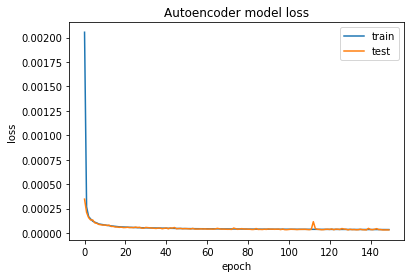

Train on 189872 samples, validate on 94935 samples
Epoch 1/50
189872/189872 [==============================] - 50s 262us/step - loss: 0.0218 - accuracy: 0.9937 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 2/50
189872/189872 [==============================] - 47s 247us/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 3/50
189872/189872 [==============================] - 48s 253us/step - loss: 0.0056 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 4/50
189872/189872 [==============================] - 46s 243us/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 5/50
189872/189872 [==============================] - 47s 248us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 6/50
189872/189872 [==============================] - 47s 245us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 7/50
189872/189872 [=================

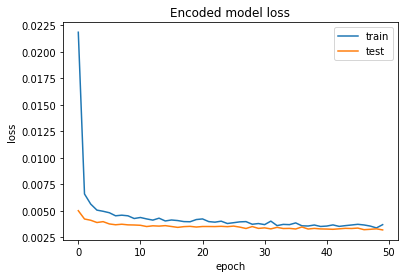

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993995891926055


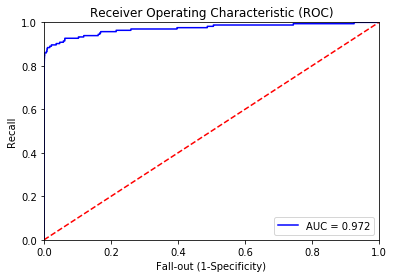

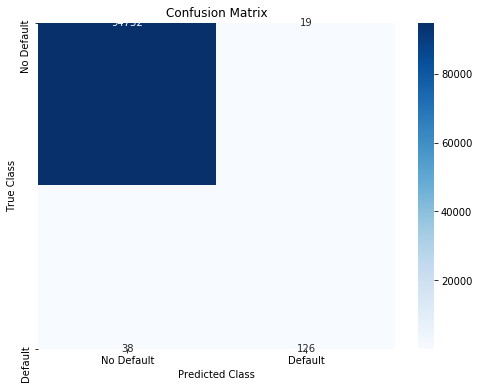

AUC(ROC): 0.8840460998283153
Precision: 0.8689655172413793
Recall: 0.7682926829268293
F1 score: 0.8155339805825242
False positives: 19
True positives: 126
False negatives: 38
True negatives: 94752


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(3, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = ADASYN(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 94753.33333333333
 Average fp = 18.333333333333332
 Average fn = 37.666666666666664
 Average tp = 126.33333333333333
 Average Precision = 0.8732718894009217
 Average Recall = 0.7703252032520325
 Average F1 score = 0.8185745140388769


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284260
 Total fp: 55
 Total fn: 113
 Total tp: 379
 Total Precision = 0.8732718894009217
 Total Recall = 0.7703252032520326
 Total F1_score = 0.8185745140388768


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 15495.247124671936 seconds ---
15495.247124671936


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

4.3042353124088715
